## Linear Regression with statmodels.api

In [1]:
# import libararies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [31]:
# load Data
data=pd.read_csv("C:/Users/hp/Downloads/2.csv")
data.head()

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2


In [32]:
# descriptive statistics..
data.describe()

,SAT,GPA,"Rand 1,2,3"
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,2.059524
std,104.530661,0.271617,0.855192
min,1634.000000,2.400000,1.000000
25%,1772.000000,3.190000,1.000000
50%,1846.000000,3.380000,2.000000
75%,1934.000000,3.502500,3.000000
max,2050.000000,3.810000,3.000000


In [33]:
# data labels...
x=data[['SAT','Rand 1,2,3']]
y=data['GPA']

In [37]:
# multiple linear rgession --sm
import statsmodels.api as sm
x1=sm.add_constant(x)
model=sm.OLS(y,x1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     27.76
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           6.58e-10
Time:                        11:50:32   Log-Likelihood:                 12.720
No. Observations:                  84   AIC:                            -19.44
Df Residuals:                      81   BIC:                            -12.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2960      0.417      0.710      0.480      -0.533       1.125
SAT            0.0017      0.000      7.432      0.000       0.001       0.002
Rand 1,2,3    -0.0083      0.027     -0.304      0.762      -0.062       0.046
==============================================================================
Omnibus:                       12.992   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.364
Skew:                          -0.731   Prob(JB):                     0.000280
Kurtosis:                       4.594   Cond. No.                     3.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
# predictions.
model.predict([1,1790,2])

array([3.23933279])

# USING sklearn

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_regression  ## for f-test
from sklearn.linear_model import LinearRegression   ## model


In [12]:
# load Data
data=pd.read_csv("C:/Users/hp/Downloads/4.csv")
data=data.dropna()  # used to drop null values 
data=pd.get_dummies(data,drop_first=True)
data.head()

,price,size,year,view_Sea view
0,234314.144,643.09,2015,0
1,228581.528,656.22,2009,0
2,281626.336,487.29,2018,1
3,401255.608,1504.75,2015,0
4,458674.256,1275.46,2009,1


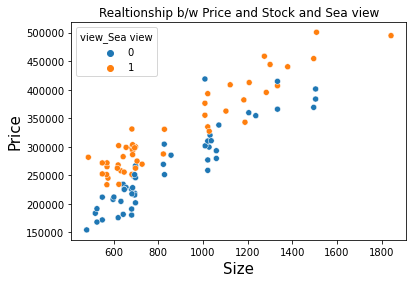

In [22]:
## relationship
sns.scatterplot(x=data['size'],y=data['price'],hue=data['view_Sea view'])
plt.xlabel("Size",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.title("Realtionship b/w Price and Stock and Sea view")
plt.show()

In [45]:
x=data[['size','year','view_Sea view']]
y=data[['price']]

In [46]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x,y)
x_scaled=scaler.transform(x)

In [51]:
from sklearn.model_selection import train_test_split as t
x_train,x_test,y_train,y_test=t(x_scaled,y,test_size=0.3,random_state=32)

In [60]:
model=LinearRegression()
model.fit(x_train,y_train)
model.score(x_train,y_train) ## training accuracy
model.score(x_test,y_test)   ## testing accuracy 
model.intercept_             # intercept
model.coef_                  # co efficients..

array([[65123.11698238, 11433.94398014, 28158.06353965]])